<a href="https://colab.research.google.com/github/kunalrajsingh/VGG16/blob/main/VGG16_AGAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
  value = random.uniform(0.5, 2)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv = np.array(hsv, dtype = np.float64)
  hsv[:,:,1] = hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255] = 255
  hsv[:,:,2] = hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255] = 255
  hsv = np.array(hsv, dtype = np.uint8)
  img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/Apple")
resultant="/content/augmentedimages"

In [ ]:
items = os.listdir(directory)
classes=[]
count=0
images = []
labels=[]
for i in items:
  i1 = 0
  print(i)
  classes.append(i)
  path1 = f"{directory}/{i}"
  a = random.randint(5,10)
  img = cv2.imread(path1)
  img = cv2.resize(img,(224,224))
  k = i.split(".")[0]
  cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
  i1+=1
  while a!=0:
    img = cv2.rotate(img,lt[random.randint(0,2)])
    images.append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
    i1+=1
    labels.append(count)
    if a%2==0:
      img = brightness(img)
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
      i1+=1
      labels.append(count)
    a-=1
  count+=1
images = np.array(images)
labels = np.array(labels)

0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959_final_masked.jpg
1a41bab0-45e0-4dda-a798-9bf4a998f1b6___FREC_Scab 3450_final_masked.jpg
0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_final_masked.jpg
0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131_final_masked.jpg
0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973_final_masked.jpg
0db71c1d-93d7-4481-b0d0-b73f995131a9___FREC_Scab 2976_final_masked.jpg
0b1e31fa-cbc0-41ed-9139-c794e6855e82___FREC_Scab 3089_final_masked.jpg
1a304331-98b5-473f-bbb1-c33b8441052a___FREC_Scab 3296_final_masked.jpg
0ea78733-9404-4536-8793-a108c66269b3___FREC_Scab 3145_final_masked.jpg
01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_final_masked.jpg


In [ ]:
images.shape

(105, 224, 224, 3)

In [ ]:
# Import necessary libraries
import tensorflow as tf

# Load a pre-trained model (example using MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Alternatively, define your own model architecture
# model = tf.keras.models.Sequential([
#     # Add your layers here
# ])

# Now you can access the layers of the model
len(model.layers)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


154

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
transferVGG = Sequential()
# adding layers from pre-trained model
for i in range(18):
    transferVGG.add(model.layers[i])
# adding custum layers
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(25,activation="softmax"))
transferVGG.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_Conv1 (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expanded_conv_depthwise              │ (None, 112, 112, 32)        │             288 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expanded_conv_depthwise_BN           │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expanded_conv_depthwise_relu (ReLU)  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expanded_conv_project (Conv2D)       │ (None, 112, 112, 16)        │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expanded_conv_project_BN             │ (None, 112, 112, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_expand (Conv2D)              │ (None, 112, 112, 96)        │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_expand_BN                    │ (None, 112, 112, 96)        │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_expand_relu (ReLU)           │ (None, 112, 112, 96)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_pad (ZeroPadding2D)          │ (None, 113, 113, 96)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_depthwise (DepthwiseConv2D)  │ (None, 56, 56, 96)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_depthwise_BN                 │ (None, 56, 56, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_depthwise_relu (ReLU)        │ (None, 56, 56, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_project (Conv2D)             │ (None, 56, 56, 24)          │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_project_BN                   │ (None, 56, 56, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 75264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 38,612,121 (147.29 MB)

 Trainable params: 38,611,529 (147.29 MB)

 Non-trainable params: 592 (2.31 KB)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images, labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2804 - loss: 22.9260call
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.2986 - loss: 24.7724
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8393 - loss: 8.5615call
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.8429 - loss: 8.1840
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9666 - loss: 0.9871call
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9695 - loss: 0.9022
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9900 - loss: 0.3436call
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9882 - loss: 0.4062
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00call

Reached 99.00% accuracy, so stopping training!!
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
transferVGG.evaluate(images,labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 0.5443 - loss: 75.3519


[90.30451202392578, 0.48571428656578064]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


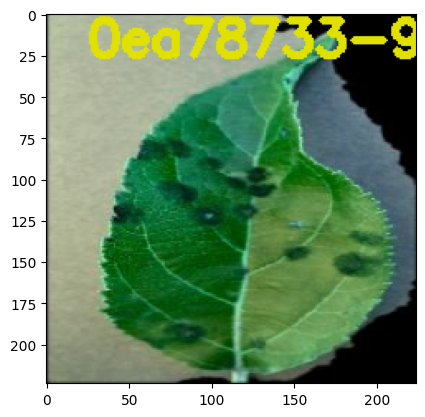

In [ ]:
def predict(i,transferVGG,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(transferVGG.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3)
    plt.imshow(img)
predict("0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131_final_masked.jpg",transferVGG,classes)